# Figure 7: Decoding models of behavioral condition from basal ganglia

In [10]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

from scipy.stats import iqr

## Read in model fits

In [3]:
results_path = os.path.join(os.environ['HOME'], 'fits/uoineuro/classification/lr_bg.h5')
results = h5py.File(results_path, 'r')

In [4]:
baseline_gp = results['logistic_0.0_0.1_gp']
baseline_snr = results['logistic_0.0_0.1_snr']
uoi_gp = results['uoi_logistic_bic_0.0_0.1_gp']
uoi_snr = results['uoi_logistic_bic_0.0_0.1_snr']

In [5]:
baselines = [baseline_gp, baseline_snr]
uois = [uoi_gp, uoi_snr]

In [6]:
# extract coefficients
baseline_coefs = [baseline['coefs'][:] for baseline in baselines]
uoi_coefs = [uoi['coefs'][:] for uoi in uois]

In [7]:
# extract selection ratios
baseline_srs = [np.count_nonzero(baseline_coef, axis=1) / baseline_coef.shape[1]
                for baseline_coef in baseline_coefs]
uoi_srs = [np.count_nonzero(uoi_coef, axis=1) / uoi_coef.shape[1]
           for uoi_coef in uoi_coefs]

In [8]:
# extract accuracy
baseline_acc = [baseline['scores'][:] for baseline in baselines]
uoi_acc = [uoi['scores'][:] for uoi in uois]

## Figure 7a-b: Performance measures of linear decoders

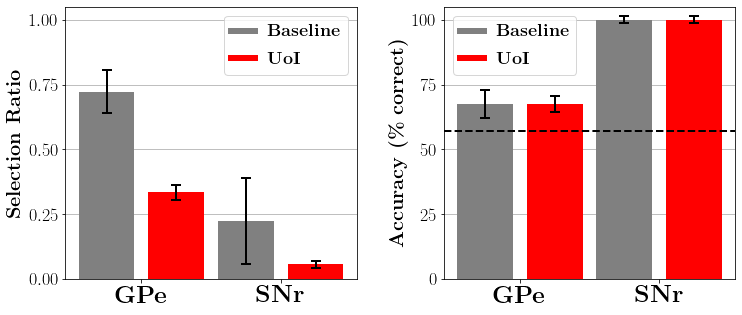

In [14]:
# plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# selection ratio plot
axes[0].bar(
    x=[0, 1, 2, 3],
    height=[np.median(baseline_srs[0]),
            np.median(uoi_srs[0]),
            np.median(baseline_srs[1]),
            np.median(uoi_srs[1])],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(baseline_srs[0]) / 2.,
          iqr(uoi_srs[0]) / 2.,
          iqr(baseline_srs[1]) / 2.,
          iqr(uoi_srs[1]) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2})

# accuracy plot
axes[1].bar(
    x=[0, 1, 2, 3],
    height=[np.median(baseline_acc[0]),
            np.median(uoi_acc[0]),
            np.median(baseline_acc[1]),
            np.median(uoi_acc[1])],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[iqr(baseline_acc[0]) / 2.,
          iqr(uoi_acc[0]) / 2.,
          iqr(baseline_acc[1]) / 2.,
          iqr(uoi_acc[1]) / 2.],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2})

# chance
axes[1].axhline(y=106./186, xmin=0, xmax=1,
                linestyle='--',
                linewidth=2,
                color='black')

# plot labels
axes[0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=20)
axes[1].set_ylabel(r'\textbf{Accuracy (\% correct)}', fontsize=20)

# cosmetic + legend
for ax in axes:
    # limits
    ax.set_ylim([0, 1.05])
    
    # ticks
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{GPe}', r'\textbf{SNr}'])
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=18)

    
    # legend labels
    ax.plot([], color='gray', label=r'\textbf{Baseline}')
    ax.plot([], color='r', label=r'\textbf{UoI}')
    lgd = ax.legend(loc='best', prop={'size': 18},
                    handletextpad=0.7,
                    handlelength=1.3)
    for line in lgd.get_lines():
        line.set_linewidth(6.0)

    # gridlines
    ax.grid('on', axis='y')
    ax.set_axisbelow(True)
    
axes[1].set_yticklabels(['0', '25', '50', '75', '100'])

plt.subplots_adjust(wspace=0.3)
plt.savefig('bg_metrics.pdf', bbox_inches='tight')

## Figure 7c: Decoder coefficient values

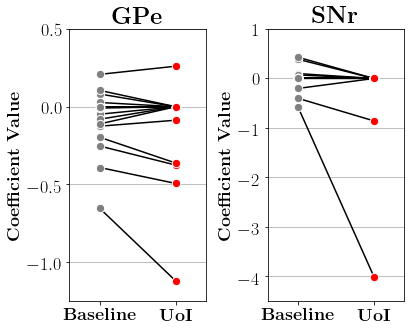

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# calculate median coefficient values
baseline_gp_ccs = np.median(baseline_coefs[0], axis=0)
uoi_gp_ccs = np.median(uoi_coefs[0], axis=0)
baseline_snr_ccs = np.median(baseline_coefs[1], axis=0)
uoi_snr_ccs = np.median(uoi_coefs[1], axis=0)

# plot coefficient values in GPe
for baseline_gp_cc, uoi_gp_cc in zip(baseline_gp_ccs, uoi_gp_ccs):
    # plot lines
    axes[0].plot(
        [0, 1], [baseline_gp_cc, uoi_gp_cc],
        color='k')
    # plot scatter points
    axes[0].scatter(
        0, baseline_gp_cc,
        color='gray',
        edgecolor='white',
        alpha=1.0,
        s=70,
        zorder=1000)
    axes[0].scatter(
        1, uoi_gp_cc,
        color='red',
        edgecolor='white',
        alpha=1.0,
        s=70,
        zorder=1000)
    
# plot coefficient values in SNr
for baseline_snr_cc, uoi_snr_cc in zip(baseline_snr_ccs, uoi_snr_ccs):
    # plot lines
    axes[1].plot(
        [0, 1], [baseline_snr_cc, uoi_snr_cc],
        color='k')
    # plot scatter points
    axes[1].scatter(
        0, baseline_snr_cc,
        color='gray',
        edgecolor='white',
        alpha=1.0,
        s=70,
        zorder=1000)
    axes[1].scatter(
        1, uoi_snr_cc,
        color='red',
        edgecolor='white',
        alpha=1.0,
        s=70,
        zorder=1000)


for ax in axes:
    ax.set_xlim([-0.40, 1.40])
    ax.set_xticks([0, 1])
    ax.set_xticklabels([r'\textbf{Baseline}', r'\textbf{UoI}'])
    ax.tick_params(labelsize=18)
    ax.set_ylabel(r'\textbf{Coefficient Value}', fontsize=18)
    
axes[0].set_ylim([-1.25, 0.25])
axes[0].set_yticks([-1, -0.5, 0, 0.5])

axes[1].set_ylim([-4.5, 1.])
axes[0].set_title(r'\textbf{GPe}', fontsize=24)
axes[1].set_title(r'\textbf{SNr}', fontsize=24)

for ax in axes:
    ax.grid('on', axis='y')
    
plt.subplots_adjust(wspace=0.45)
plt.savefig('bg_coefficient_lineplot.pdf', bbox_inches='tight')